#Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Data reading

In [2]:
df=pd.read_csv(r"C:\Users\Mayur\Desktop\DS assignment 2 - ADR Clasification\Data.csv")
df.head()

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1


In [3]:
len(df)

23516

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Class Distribution')

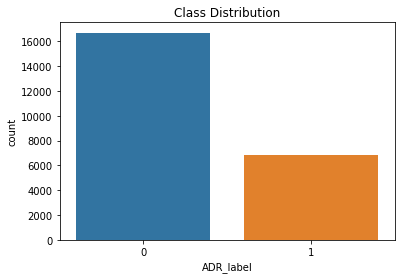

In [6]:
#Priliminary Analysis on data
#Frequency plot of classes
import seaborn as sns
import matplotlib.pyplot as plt
print(sns.countplot(df['ADR_label'],label=True))
plt.title('Class Distribution')

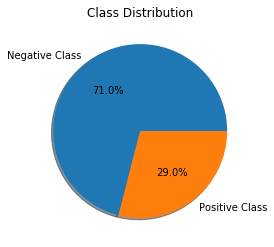

In [7]:
#Visualizing the classes of train data
chat_data = df['ADR_label'].value_counts()
plt.pie(chat_data, autopct='%1.1f%%', shadow=True,labels=['Negative Class','Positive Class'])
plt.title('Class Distribution');
plt.show()

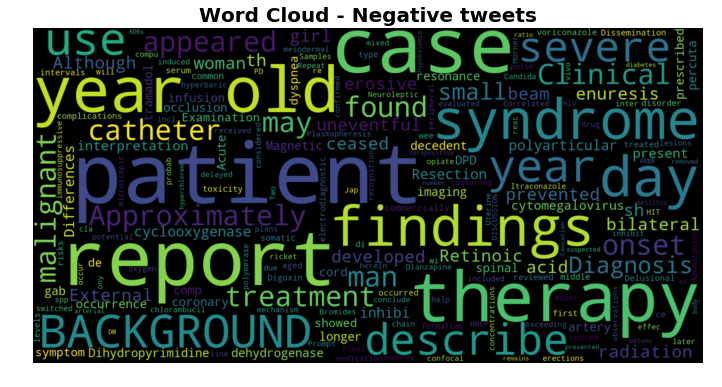

In [37]:
#Word cloud of negative tweets
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(df[df['ADR_label']==0]['Tweet']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Negative tweets',fontsize=20,fontweight='bold')
plt.show()

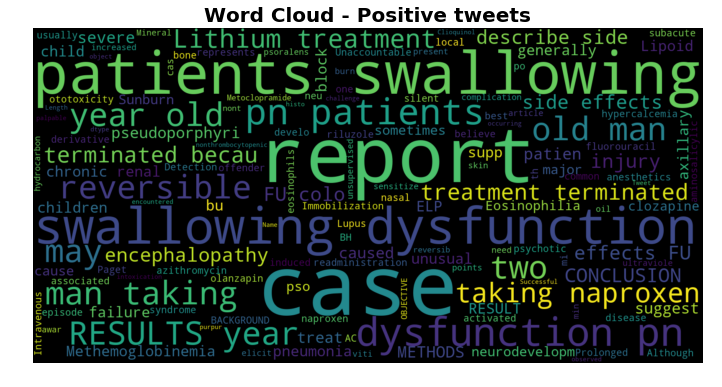

In [66]:
#Word cloud of positive tweets
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(df[df['ADR_label']==1]['Tweet']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Positive tweets',fontsize=20,fontweight='bold')
plt.show()

Data Cleaning


In [9]:
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
import regex

wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha()]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)

In [10]:
df["filtered_text"] = df.Tweet.apply(lambda x : filter_text(x, stop)) 
df.head(20)


,UserId,TweetId,Tweet,ADR_label,filtered_text
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1,intravenous azithromycin induce ototoxicity
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1,immobilization paget bone disease present perh...
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1,unaccountable severe hypercalcemia patient tre...
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1,methods report two case pseudoporphyria cause ...
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1,methods report two case pseudoporphyria cause ...
5,10082597,599105,"Naproxen, the most common offender, has been a...",1,naproxen common offender associate dimorphic c...
6,10082597,259287,RESULTS: A 44-year-old man taking naproxen for...,1,result year old man take naproxen chronic low ...
7,10082597,479710,RESULTS: A 44-year-old man taking naproxen for...,1,result year old man take naproxen chronic low ...
8,10082597,141130,RESULTS: A 44-year-old man taking naproxen for...,1,result year old man take naproxen chronic low ...
9,10082597,787933,RESULTS: A 44-year-old man taking naproxen for...,1,result year old man take naproxen chronic low ...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False)
ml_data = tfidf.fit_transform(df['filtered_text'])

In [12]:
ml_data.shape

(23516, 14529)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ml_data,df['ADR_label'], stratify=df['ADR_label'], test_size=0.2)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix,classification_report

model = LogisticRegression(solver='lbfgs',multi_class='auto', max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
predicted = model.predict(x_test)



In [16]:
classification_report(y_test,predicted)

'              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      3339\n           1       0.84      0.63      0.72      1365\n\n    accuracy                           0.86      4704\n   macro avg       0.85      0.79      0.81      4704\nweighted avg       0.86      0.86      0.85      4704\n'

In [34]:
confusion_matrix(y_test,predicted)

array([[3190,  149],
       [ 497,  868]], dtype=int64)

In [17]:
accuracy_score(y_test,predicted)

0.8573554421768708

In [18]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Decision Tree

In [19]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
prediction=dt.predict(x_test)

In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3339
           1       0.71      0.76      0.73      1365

    accuracy                           0.84      4704
   macro avg       0.80      0.82      0.81      4704
weighted avg       0.84      0.84      0.84      4704



In [23]:
accuracy_score(y_test,prediction)

0.8392857142857143

# Random Forest

In [24]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

C:\Users\Mayur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
prediction=rf.predict(x_test)

In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3339
           1       0.92      0.64      0.75      1365

    accuracy                           0.88      4704
   macro avg       0.89      0.81      0.84      4704
weighted avg       0.88      0.88      0.87      4704



In [27]:
accuracy_score(y_test,prediction)

0.8779761904761905

# AdaBoost Classifier

In [29]:
ad=AdaBoostClassifier()

In [30]:
ad.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [31]:
prediction=ad.predict(x_test)

In [32]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      3339
           1       0.70      0.49      0.58      1365

    accuracy                           0.79      4704
   macro avg       0.76      0.70      0.72      4704
weighted avg       0.78      0.79      0.78      4704



In [33]:
accuracy_score(y_test,prediction)

0.7903911564625851